In [1]:
#Import code from last time
%run NE4-6.ipynb

         Current function value: 0.586818
         Iterations: 100
         Function evaluations: 104
         Gradient evaluations: 104


<Figure size 640x480 with 1 Axes>

         Current function value: 0.413475
         Iterations: 100
         Function evaluations: 105
         Gradient evaluations: 105


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [2]:
testX

array([[0.26056338, 0.44281211, 0.70467434, 0.65104606],
       [0.3943662 , 0.49627058, 0.65104606, 0.44790417],
       [0.62676056, 0.47546339, 0.44790417, 0.67977021],
       [0.79577465, 0.55155979, 0.67977021, 0.53034543],
       [0.70422535, 0.50099435, 0.53034543, 0.78390263],
       [0.53521127, 0.44545859, 0.78390263, 0.3349028 ],
       [0.40140845, 0.50571167, 0.3349028 , 0.87703401],
       [0.12676056, 0.46588904, 0.87703401, 0.70343061],
       [0.33098592, 0.46785659, 0.70343061, 0.6764536 ],
       [0.41549296, 0.45300142, 0.6764536 , 0.7996565 ],
       [0.55633803, 0.43741172, 0.7996565 , 0.6539629 ],
       [0.5915493 , 0.3506737 , 0.6539629 , 0.73176979],
       [0.51408451, 0.36403131, 0.73176979, 0.60723434]])

In [3]:
testY

array([[0.44790417],
       [0.67977021],
       [0.53034543],
       [0.78390263],
       [0.3349028 ],
       [0.87703401],
       [0.70343061],
       [0.6764536 ],
       [0.7996565 ],
       [0.6539629 ],
       [0.73176979],
       [0.60723434],
       [0.67      ]])

In [4]:
trainX

array([[0.43661972, 0.14831904, 0.56633945, 0.26372911],
       [0.57042253, 0.11211342, 0.26372911, 0.3349176 ],
       [0.66901409, 0.17073406, 0.3349176 , 0.52901287],
       [0.6971831 , 0.2232566 , 0.52901287, 0.46778898],
       [0.97183099, 0.24197469, 0.46778898, 0.58859326],
       [0.5915493 , 0.36573346, 0.58859326, 0.28650113],
       [0.28169014, 0.55255899, 0.28650113, 0.47320807],
       [0.26056338, 0.37002352, 0.47320807, 0.45271621],
       [0.46478873, 0.3325317 , 0.45271621, 0.38367462],
       [0.99295775, 0.38788752, 0.38367462, 0.23399813],
       [0.67605634, 0.39836394, 0.23399813, 0.35317372],
       [0.25352113, 0.2848263 , 0.35317372, 0.14062986],
       [0.45070423, 0.18673502, 0.14062986, 0.26372911],
       [0.        , 0.18269477, 0.26372911, 0.33746428],
       [0.48591549, 0.255617  , 0.33746428, 0.28799656],
       [0.78169014, 0.23597043, 0.28799656, 0.50986837],
       [0.8028169 , 0.16413413, 0.50986837, 0.50986837],
       [0.3028169 , 0.17817663,

In [5]:
trainY

array([[0.3349176 ],
       [0.52901287],
       [0.46778898],
       [0.58859326],
       [0.28650113],
       [0.47320807],
       [0.45271621],
       [0.38367462],
       [0.23399813],
       [0.35317372],
       [0.14062986],
       [0.26372911],
       [0.33746428],
       [0.28799656],
       [0.50986837],
       [0.50986837],
       [0.        ],
       [0.47639142],
       [0.44976976],
       [0.46613068],
       [0.5882231 ],
       [0.63635825],
       [0.57313552],
       [0.45643258],
       [0.76222627],
       [0.55359126],
       [0.71115948],
       [0.31546218],
       [0.60413983],
       [0.83761975],
       [0.7476273 ],
       [0.84718459],
       [0.85934053],
       [0.78972149],
       [0.74365922],
       [0.68135448],
       [0.89668192],
       [0.73519004],
       [0.98720739],
       [0.50502673],
       [1.        ],
       [0.93787293],
       [0.80331364],
       [0.94438769],
       [0.78782629],
       [0.70467434],
       [0.65104606]])

In [6]:
#Regularization Parameter:
Lambda = 0.0001

In [7]:
#Need to make changes to costFunction and costFunctionPrim:
def costFunction(self, X, y):
    #Compute cost for given X,y, use weights already stored in class.
    self.yHat = self.forward(X)
    #We don't want cost to increase with the number of examples, so normalize by dividing the error term by number of examples(X.shape[0])
    J = 0.5*sum((y-self.yHat)**2)/X.shape[0] + (self.Lambda/2)*(sum(self.W1**2)+sum(self.W2**2))
    return J

def costFunctionPrime(self, X, y):
    #Compute derivative with respect to W and W2 for a given X and y:
    self.yHat = self.forward(X)

    delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
    #Add gradient of regularization term:
    dJdW2 = np.dot(self.a2.T, delta3)/X.shape[0] + self.Lambda*self.W2

    delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
    #Add gradient of regularization term:
    dJdW1 = np.dot(X.T, delta2)/X.shape[0] + self.Lambda*self.W1

    return dJdW1, dJdW2

In [8]:
#New complete class, with changes:
class Neural_Network(object):
    def __init__(self, Lambda=0.0001):        
        #Define Hyperparameters
        self.inputLayerSize = 4
        self.outputLayerSize = 1
        self.hiddenLayerSize = 6
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
        #Regularization Parameter:
        self.Lambda = Lambda
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)/X.shape[0] + (self.Lambda/2)*(np.sum(self.W1**2)+np.sum(self.W2**2))
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        #Add gradient of regularization term:
        dJdW2 = np.dot(self.a2.T, delta3)/X.shape[0] + self.Lambda*self.W2
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        #Add gradient of regularization term:
        dJdW1 = np.dot(X.T, delta2)/X.shape[0] + self.Lambda*self.W1
        
        return dJdW1, dJdW2
    
    def predict(self):
        prediksi = self.forward(dataprediksi)
        return prediksi
    
    #Helper functions for interacting with other methods/classes
    def getParams(self):
        #Get W1 and W2 Rolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single parameter vector:
        W1_start = 0
        W1_end = self.hiddenLayerSize*self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], \
                             (self.inputLayerSize, self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], \
                             (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

In [9]:
def computeNumericalGradient(N, X, y):
    paramsInitial = N.getParams()
    numgrad = np.zeros(paramsInitial.shape)
    perturb = np.zeros(paramsInitial.shape)
    e = 1e-4

    for p in range(len(paramsInitial)):
        #Set perturbation vector
        perturb[p] = e
        N.setParams(paramsInitial + perturb)
        loss2 = N.costFunction(X, y)
            
        N.setParams(paramsInitial - perturb)
        loss1 = N.costFunction(X, y)

        #Compute Numerical Gradient
        numgrad[p] = (loss2 - loss1) / (2*e)

            #Return the value we changed to zero:
        perturb[p] = 0
            
    #Return Params to original value:
    N.setParams(paramsInitial)

    return numgrad 

In [10]:
NN = Neural_Network(Lambda=0.0001)

In [11]:
#Make sure our gradients our correct after making changes:
numgrad = computeNumericalGradient(NN, X, y)
grad = NN.computeGradients(X,y)

In [12]:
#Should be less than 1e-8:
np.linalg.norm(grad-numgrad)/np.linalg.norm(grad+numgrad)

4.1210944284385943e-10

In [13]:
T = trainer(NN)

In [14]:
T.train(X,y,testX,testY)

         Current function value: 0.013092
         Iterations: 100
         Function evaluations: 103
         Gradient evaluations: 103


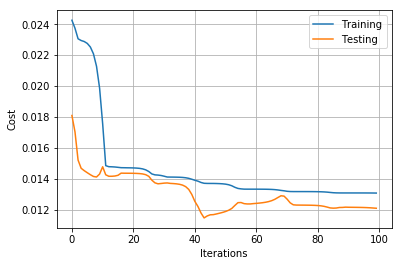

In [15]:
plot.plot(T.J)
plot.plot(T.testJ)
plot.grid(1)
plot.xlabel('Iterations')
plot.ylabel('Cost')
plot.legend(['Training', 'Testing'])
plot.show()

In [16]:
T.J

[array([0.02425514]),
 array([0.02373605]),
 array([0.02305737]),
 array([0.02294559]),
 array([0.02288043]),
 array([0.02275797]),
 array([0.02252567]),
 array([0.0220883]),
 array([0.02128402]),
 array([0.01987258]),
 array([0.01756828]),
 array([0.01486364]),
 array([0.01479555]),
 array([0.01478858]),
 array([0.01477585]),
 array([0.01475418]),
 array([0.01473176]),
 array([0.01472869]),
 array([0.01472441]),
 array([0.01472137]),
 array([0.01471601]),
 array([0.01470616]),
 array([0.0146879]),
 array([0.0146541]),
 array([0.01459246]),
 array([0.01448466]),
 array([0.01432829]),
 array([0.01426852]),
 array([0.01425389]),
 array([0.01422717]),
 array([0.01418089]),
 array([0.0141284]),
 array([0.01412482]),
 array([0.01412302]),
 array([0.0141197]),
 array([0.01411345]),
 array([0.01410182]),
 array([0.01408062]),
 array([0.01404367]),
 array([0.01398511]),
 array([0.01391793]),
 array([0.01386092]),
 array([0.01377593]),
 array([0.01372355]),
 array([0.01371522]),
 array([0.01371

In [17]:
T.testJ

[array([0.01810196]),
 array([0.01704213]),
 array([0.01522279]),
 array([0.0146938]),
 array([0.01453966]),
 array([0.01440686]),
 array([0.01427789]),
 array([0.01416518]),
 array([0.01413017]),
 array([0.01431926]),
 array([0.01478976]),
 array([0.01427251]),
 array([0.01417715]),
 array([0.01417757]),
 array([0.01419377]),
 array([0.01424122]),
 array([0.014379]),
 array([0.01437452]),
 array([0.01437322]),
 array([0.0143714]),
 array([0.01436844]),
 array([0.01436243]),
 array([0.01435069]),
 array([0.01432753]),
 array([0.01427991]),
 array([0.01417379]),
 array([0.01392582]),
 array([0.01375271]),
 array([0.01369062]),
 array([0.01371061]),
 array([0.01373446]),
 array([0.01374581]),
 array([0.0137168]),
 array([0.01370522]),
 array([0.01368769]),
 array([0.01365824]),
 array([0.01360523]),
 array([0.01350751]),
 array([0.01332695]),
 array([0.01300079]),
 array([0.01255109]),
 array([0.01222265]),
 array([0.01180094]),
 array([0.01148706]),
 array([0.01161338]),
 array([0.01168

In [18]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(T.J, T.testJ)

0.001555896445557261

In [19]:
yHat=NN.forward(X)

In [20]:
yHat

array([[0.50058857],
       [0.33920055],
       [0.40835775],
       [0.48328967],
       [0.41448764],
       [0.51110931],
       [0.53041161],
       [0.58682842],
       [0.50263434],
       [0.30493133],
       [0.34680852],
       [0.42895464],
       [0.30507179],
       [0.49126009],
       [0.4022207 ],
       [0.36261309],
       [0.44746945],
       [0.43286874],
       [0.29392323],
       [0.51478642],
       [0.45923619],
       [0.51491733],
       [0.47307959],
       [0.61744786],
       [0.60193885],
       [0.6111187 ],
       [0.6369354 ],
       [0.52968334],
       [0.58502558],
       [0.53622766],
       [0.67934375],
       [0.75576899],
       [0.72636963],
       [0.69082912],
       [0.68934299],
       [0.72616544],
       [0.70146707],
       [0.73551561],
       [0.76318912],
       [0.71128093],
       [0.75276414],
       [0.74135509],
       [0.84706388],
       [0.80131941],
       [0.78043165],
       [0.7510758 ],
       [0.71779621],
       [0.725

In [21]:
y

array([[0.3349176 ],
       [0.52901287],
       [0.46778898],
       [0.58859326],
       [0.28650113],
       [0.47320807],
       [0.45271621],
       [0.38367462],
       [0.23399813],
       [0.35317372],
       [0.14062986],
       [0.26372911],
       [0.33746428],
       [0.28799656],
       [0.50986837],
       [0.50986837],
       [0.        ],
       [0.47639142],
       [0.44976976],
       [0.46613068],
       [0.5882231 ],
       [0.63635825],
       [0.57313552],
       [0.45643258],
       [0.76222627],
       [0.55359126],
       [0.71115948],
       [0.31546218],
       [0.60413983],
       [0.83761975],
       [0.7476273 ],
       [0.84718459],
       [0.85934053],
       [0.78972149],
       [0.74365922],
       [0.68135448],
       [0.89668192],
       [0.73519004],
       [0.98720739],
       [0.50502673],
       [1.        ],
       [0.93787293],
       [0.80331364],
       [0.94438769],
       [0.78782629],
       [0.70467434],
       [0.65104606],
       [0.447

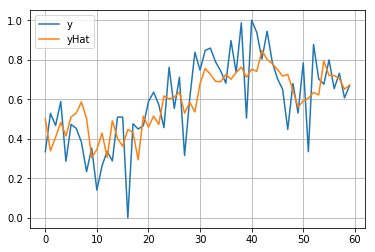

In [22]:
#Plot cost during training:
plot.plot(y)
plot.plot(yHat)
plot.grid(1)
plot.legend(['y', 'yHat'])
plot.show()

In [23]:
prediksi=NN.forward(dataprediksi)

In [24]:
prediksi

array([[0.71409702],
       [0.75371541],
       [0.67093396],
       [0.42997514]])

In [25]:
from sklearn.metrics import mean_squared_error 

In [26]:
Y_true= ([	0.67	]	,
[	0.389745184	]	,
[	0.136735812	]	,
[	0.366973156	]	,

)


Y_pred=prediksi
mean_squared_error(Y_true,Y_pred) 

0.1059389459662618

In [27]:
dataprediksi

array([[0.38732394, 0.79538041, 0.60723434, 0.67      ],
       [0.37323944, 1.        , 0.67      , 0.67      ],
       [0.36619718, 0.70768171, 0.67      , 0.38974518],
       [0.44366197, 0.49169532, 0.38974518, 0.13673581]])

In [28]:
z=np.array([	0.56136209	,	0.51319034])

In [29]:
y=np.array([0.136735812	,	0.366973156	])

In [30]:
a=np.concatenate((z,y))

In [31]:
#prediksi 1
prediksi=NN.forward(a)
prediksi

ValueError: shapes (3,) and (4,6) not aligned: 3 (dim 0) != 4 (dim 0)

In [ ]:
#prediksi 2
c=prediksi
z1=np.array([0.59014524	,	0.48673204])
b=y[1:]
d=np.concatenate((z1,b,c))
prediksi=NN.forward(d)
prediksi

In [ ]:
#prediksi 3
c=prediksi
z2=np.array([0.52737156	,	0.43012934])
b=y[1:]
d=np.concatenate((z2,b,c))
prediksi=NN.forward(d)
prediksi

In [ ]:
#prediksi 4
c=prediksi
z3=np.array([0.460205	,	0.41357631])
b=y[1:]
d=np.concatenate((z3,b,c))
prediksi=NN.forward(d)
prediksi

In [ ]:
#prediksi 5
c=prediksi
z4=np.array([0.40834019	,	0.41626853])
b=y[1:]
d=np.concatenate((z4,b,c))
prediksi=NN.forward(d)
prediksi

In [ ]:
#prediksi 6
c=prediksi
z5=np.array([0.42786469	,	0.41314695])
b=y[1:]
d=np.concatenate((z5,b,c))
prediksi=NN.forward(d)
prediksi